# Blood Pressure from PPG signal

In this notebook, you should solve the problem in Task 4 (blood pressure estimation from PPG signal) in the first assignment (<a href="http://kovan.ceng.metu.edu.tr/~sinan/DL/HW1.html">HW1</a>) using a CNN architecture that you should construct using the layers and the network you developed in this HW.

The notebook is intentionally composed of only this cell. You can copy-paste any text, data, cell, or code that you developed in this HW or HW1. You can add as many cells as you want. You can create files on the disk as freely as you like.

In [1]:
import random
import numpy as np
from oldhom.utils import load_BP_dataset
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
def get_data(datafile, training_ratio=0.9, test_ratio=0.06, val_ratio=0.01):
  # Load the PPG training data 
  X, y = load_BP_dataset(datafile)
  # this is not what supposed to happen
  length = X.shape[0]
  concated = np.concatenate((X,y),axis=1)
  np.random.shuffle(concated)
  # Splitting into 0.7,0.1,0.2
  train_rat,val_rat = int(0.7*length),int(0.8*length)
   
  X_train = concated[:train_rat,:1000]
  y_train = concated[:train_rat,1000:]
  X_val   = concated[train_rat:val_rat,:1000]
  y_val   = concated[train_rat:val_rat,1000:]
  X_test  = concated[val_rat:,:1000]
  y_test  = concated[val_rat:,1000:]
  ################################################################
  # TODO: Split the data into training, validation and test sets #
  ################################################################
  pass
  #########    END OF YOUR CODE    ###############################
  ################################################################
  
  return X_train, y_train, X_val, y_val, X_test, y_test

datafile = 'cs231n/datasets/Part_1.mat' #TODO: PATH to your data file
input_size = 1000 # TODO: Size of the input of the network

X_train, y_train, X_val, y_val, X_test, y_test = get_data(datafile)
print ("Number of instances in the training set: ", len(X_train))
print ("Number of instances in the validation set: ", len(X_val))
print ("Number of instances in the testing set: ", len(X_test))

Loading : |##########|
Number of instances in the training set:  2100
Number of instances in the validation set:  300
Number of instances in the testing set:  600


In [3]:
# Now, let's train a neural network
from cs231n.bp_model import BPNET
hidden_size = 512 # TODO: Choose a suitable hidden layer size
num_classes = 2 # We have two outputs
net = BPNET(input_shape=(1,1,1000), num_classes=2, num_filters=[8,8,16,16,32], num_hidden=[256], filter_size=7, pool_cita=4)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val, num_iters=500, batch_size=64, 
                  learning_rate=0.001, learning_rate_decay=0.9, reg=0.001, verbose=True)

# Predict on the validation set
#val_err = ... # TODO: Perform prediction on the validation set
val_err = np.sum(np.square(net.predict(X_val) - y_val), axis=1).mean()
print ('Validation error: ', val_err)

BRO
iteration 0 / 500: loss 10097.992369
Val error : 20195.532 , Train error : 20136.446 
iteration 20 / 500: loss 2416.470362
Val error : 1370.384 , Train error : 1535.598 
iteration 40 / 500: loss 572.088071
iteration 60 / 500: loss 362.501990
Val error : 709.744 , Train error : 731.317 
iteration 80 / 500: loss 373.220739
Val error : 899.954 , Train error : 717.845 
iteration 100 / 500: loss 399.181050
iteration 120 / 500: loss 315.602604
Val error : 771.493 , Train error : 719.519 
iteration 140 / 500: loss 441.226563
iteration 160 / 500: loss 349.827285
Val error : 634.827 , Train error : 743.290 
iteration 180 / 500: loss 398.806742
Val error : 656.587 , Train error : 729.254 
iteration 200 / 500: loss 414.910346
iteration 220 / 500: loss 477.380657
Val error : 698.955 , Train error : 752.479 
iteration 240 / 500: loss 464.973643
Val error : 760.367 , Train error : 724.536 
iteration 260 / 500: loss 378.617967
iteration 280 / 500: loss 566.333851
Val error : 998.614 , Train error

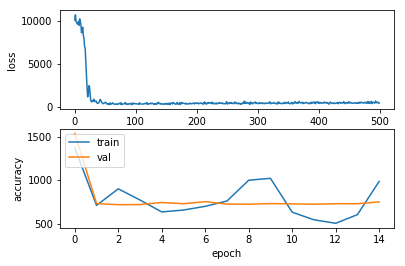

In [8]:
plt.subplot(2, 1, 1)
plt.plot(stats["loss_history"])
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(new_train)
plt.plot(new_val)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()